In [106]:
#Q1
#Import the dataset by using the read_excel( ) function of Pandas
import pandas as pd
titanic_df = pd.read_excel(r"C:\Users\Joyce\Desktop\CSC 240\Lab1\titanic_data.xlsx")


#Culculate missing value
missing_age = titanic_df[titanic_df["Age"].isnull()]
print(len(missing_age))
#There are 177 missing values.

#Culculate missing value percentage
missing_age_percentage = len(missing_age)/len(titanic_df)
print(missing_age_percentage)
#The missing value percentage is 0.19865319865319866

#Drop missing value
titanic_df = titanic_df.dropna(axis=0, subset=['Age'])


177
0.19865319865319866


In [107]:
#Q2
import numpy as np
titanic_df["NotAlone"] = np.where((titanic_df["SibSp"] == 0) & (titanic_df["Parch"] == 0), 0, 1)

In [108]:
#Q3
titanic_df_passenger_class_1 = titanic_df.loc[titanic_df['Pclass'] == 1]
titanic_df_passenger_class_2 = titanic_df.loc[titanic_df['Pclass'] == 2]
titanic_df_passenger_class_3 = titanic_df.loc[titanic_df['Pclass'] == 3]
print(len(titanic_df_passenger_class_1),len(titanic_df_passenger_class_2),len(titanic_df_passenger_class_3))

#In class 1, there are 186 observations. In class 2, there are 173 observations. In class 3, there are 355 observations. Class 3 is the biggest passenger class.

#Culculate mean and median for Age
print(titanic_df_passenger_class_1["Age"].mean(),titanic_df_passenger_class_2["Age"].mean(),titanic_df_passenger_class_3["Age"].mean())
print(titanic_df_passenger_class_1["Age"].median(),titanic_df_passenger_class_2["Age"].median(),titanic_df_passenger_class_3["Age"].median())
#Culculate mean and median for Fare
print(titanic_df_passenger_class_1["Fare"].mean(),titanic_df_passenger_class_2["Fare"].mean(),titanic_df_passenger_class_3["Fare"].mean())
print(titanic_df_passenger_class_1["Fare"].median(),titanic_df_passenger_class_2["Fare"].median(),titanic_df_passenger_class_3["Fare"].median())

#For Age, class 1 has the highest mean, and class 3 has the lowest mean; class 1 has the highest median, and class 3 has the lowest median. 
#For Fare, class 1 has the highest mean, and class 3 has the lowest mean, class 1 has the highest median, and class 3 has the lowest median.

186 173 355
38.233440860215055 29.87763005780347 25.14061971830986
37.0 29.0 24.0
87.96158225806447 21.47155606936416 13.229435211267623
69.3 15.0458 8.05


In [109]:
#Q4

#Create two different datasets using the Survived feature
titanic_df_survived = titanic_df.loc[titanic_df["Survived"]==1]
titanic_df_not_survived = titanic_df.loc[titanic_df["Survived"]==0]

#Find the number of observations in each dataset
print(len(titanic_df_survived),len(titanic_df_not_survived))
#290 people survived and 424 people did not survive.

#print the number of people survived in each class
print(len(titanic_df_passenger_class_1[titanic_df_passenger_class_1["Survived"]==1]), 
      len(titanic_df_passenger_class_2[titanic_df_passenger_class_2["Survived"]==1]),
      len(titanic_df_passenger_class_3[titanic_df_passenger_class_3["Survived"]==1])
     )
#122 people survived in class 1. 83 people survived in class 2. 85 people survived in class 3.

#print the number of people who did not survive in each class
print(len(titanic_df_passenger_class_1[titanic_df_passenger_class_1["Survived"]==0]),
      len(titanic_df_passenger_class_2[titanic_df_passenger_class_2["Survived"]==0]),
      len(titanic_df_passenger_class_3[titanic_df_passenger_class_3["Survived"]==0])
     )
#64 people did not survive in class 1. 90 people did not survive in class 2. 270 people did not survive in class 3.

290 424
122 83 85
64 90 270


In [110]:
#Q5

import math

#variance function
def variance(x):
    number_obs = len(x) #the number of population
    mean = statistics.mean(x) #the mean of the observations
    var = sum((xi - mean)**2 for xi in x)/len(x)
    return var
    
#function of standard deviation
def std_dev(x):
    std = math.sqrt(variance(x))
    return std

#function of correlation
def correlation(x,y):
    x_basket = []
    y_basket = []
    top = []
    bottom_x = []
    bottom_y = []
    
    x_mean = x.mean()
    y_mean = y.mean()
    for xi in x:
        x_basket.append(xi - x_mean)
    for yi in y:
        y_basket.append(yi - y_mean)
    for i in range(len(x_basket)):
        top.append(x_basket[i] * y_basket[i])
        bottom_x.append((x_basket[i])**2)
        bottom_y.append((y_basket[i])**2)
   
    molecular = sum(top)
    bx = sum(bottom_x)
    by = sum(bottom_y)
    denominator = math.sqrt(bx*by)
    corr = molecular/denominator
    return corr



In [111]:
#Q6
matix_df = pd.DataFrame(titanic_df,columns=["Survived","Age", "SibSp", "Parch", "Fare", "NotAlone"]) #make a subset
corrMatrix = matix_df.corr() #make corr matrix
print (corrMatrix) #print corr matrix
print('\n')

print(
correlation(titanic_df["Survived"],titanic_df["Age"]),'\n', #Survived and Age have a very weak negative correlation
correlation(titanic_df["Survived"],titanic_df["SibSp"]),'\n', #Survived and SibSp have a very weak negative correlation
correlation(titanic_df["Survived"],titanic_df["Parch"]),'\n', #Survived and Parch have a very weak positive correlation
correlation(titanic_df["Survived"],titanic_df["Fare"]),'\n', #Survived and Fare have a weak positive correlation
correlation(titanic_df["Survived"],titanic_df["NotAlone"]),'\n', #Survived and NotAlone have a weak positive correlation
correlation(titanic_df["SibSp"],titanic_df["Age"]),'\n', #Age and SibSp have a weak negative correlation
correlation(titanic_df["Parch"],titanic_df["Age"]),'\n', #Age and Parch have a weak negative correlation
correlation(titanic_df["Fare"],titanic_df["Age"]),'\n', #Age and Fare have a very weak positive correlation
correlation(titanic_df["NotAlone"],titanic_df["Age"]),'\n', #Age and NotAlone have a weak negative correlation
correlation(titanic_df["SibSp"],titanic_df["Parch"]),'\n', #SibSp and Parch have a weak positive correlation
correlation(titanic_df["SibSp"],titanic_df["Fare"]),'\n', #SibSp and Fare have a weak positive correlation
correlation(titanic_df["SibSp"],titanic_df["NotAlone"]),'\n', #SibSp and NotAlone have a medium positive correlation
correlation(titanic_df["Parch"],titanic_df["Fare"]),'\n', #Parch and Fare have a weak positive correlation
correlation(titanic_df["Parch"],titanic_df["NotAlone"]),'\n', #Parch and NotAlone have a weak positive correlation
correlation(titanic_df["Fare"],titanic_df["NotAlone"]) #Fare and NotAlone have a weak positive correlation
     )
#SibSp and NotAlone are relatively close related comparing to other variables because their correlation is the highest among all correlations.
#Correlations between all numerical values are below 0.6, which means that they all have weak correlations, except the correlation between SibSp and NotAlone.
#The correlation between Parch and NotAlone is about 0.5775, which is very close to 0.6. It's the second highest correlation.
#There are no strongly correlated values because none of the correlations exceeds 0.8.

          Survived       Age     SibSp     Parch      Fare  NotAlone
Survived  1.000000 -0.077221 -0.017358  0.093317  0.268189  0.196140
Age      -0.077221  1.000000 -0.308247 -0.189119  0.096067 -0.198270
SibSp    -0.017358 -0.308247  1.000000  0.383820  0.138329  0.629818
Parch     0.093317 -0.189119  0.383820  1.000000  0.205119  0.577524
Fare      0.268189  0.096067  0.138329  0.205119  1.000000  0.260136
NotAlone  0.196140 -0.198270  0.629818  0.577524  0.260136  1.000000


-0.07722109457217737 
 -0.01735836047953392 
 0.09331700774224345 
 0.2681886168744772 
 0.19614042733716913 
 -0.3082467589236574 
 -0.18911926263203518 
 0.09606669176903881 
 -0.19827000378179802 
 0.3838198640428351 
 0.13832879455544905 
 0.6298182440322461 
 0.20511888430378045 
 0.5775244139668505 
 0.2601363564406405


14.526497332334044
52.9189295025436
17.875
25.325


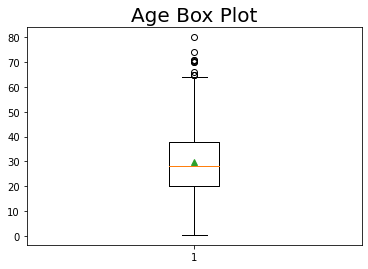

In [112]:
#Q7

import matplotlib.pyplot as plt

#Calculate the standard deviation for Age 
age_std = titanic_df["Age"].std()
print(age_std)
#The standard deviation for Age is 14.5265

#Calculate the standard deviation for Fare
fare_std = titanic_df["Fare"].std()
print(fare_std)
#The standard deviation for Fare is 52.9189

#Calculate the interquartile range for the Age 
age_q3, age_q1 = np.percentile(titanic_df['Age'], [75 ,25])
iqr_age = age_q3 - age_q1
print(iqr_age)

#Calculate the interquartile range for the Fare 
fare_q3, fare_q1 = np.percentile(titanic_df["Fare"],[75,25])
iqr_fare = fare_q3 - fare_q1
print(iqr_fare)
#The interquartile range for the Age is 17.875, and the interquartile range for the Fare is 25.325.


plt.boxplot(titanic_df["Age"], showmeans = True)
plt.title("Age Box Plot", fontsize = 20)
plt.show()
#From the box plot of Age, we can see that the data is right-skewed, and the majority of the observations is below the mean.

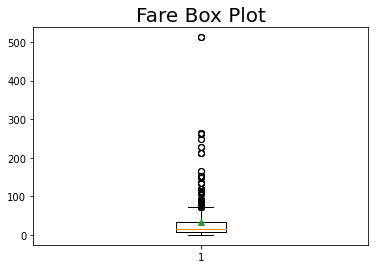

In [113]:
plt.boxplot(titanic_df["Fare"], showmeans = True)
plt.title("Fare Box Plot", fontsize = 20)
plt.show()
#From the box plot of Fare, we can see that the data is right-skewed, and the majority of the observations is below the mean.

In [114]:
#Q8

#8.1

# P(Survived = true | Gender = female, Class = 1)
P_f1 = len(titanic_df.loc[(titanic_df["Sex"]=="female") & (titanic_df["Pclass"]==1)]) 
P_s1 = len(titanic_df.loc[(titanic_df["Sex"]=="female") & (titanic_df["Pclass"]==1) & (titanic_df["Survived"]==1)]) 
print(P_s1/P_f1)

# P(Survived = true | Gender = female, Class = 2)
P_f2 = len(titanic_df.loc[(titanic_df["Sex"]=="female") & (titanic_df["Pclass"]==2)]) 
P_s2 = len(titanic_df.loc[(titanic_df["Sex"]=="female") & (titanic_df["Pclass"]==2) & (titanic_df["Survived"]==1)]) 
print(P_s2/P_f2)

# P(Survived = true | Gender = female, Class = 3)
P_f3 = len(titanic_df.loc[(titanic_df["Sex"]=="female") & (titanic_df["Pclass"]==3)]) 
P_s3 = len(titanic_df.loc[(titanic_df["Sex"]=="female") & (titanic_df["Pclass"]==3) & (titanic_df["Survived"]==1)]) 
print(P_s3/P_f3)

# P(Survived = true | Gender = male, Class = 1)
P_m1 = len(titanic_df.loc[(titanic_df["Sex"]=="male") & (titanic_df["Pclass"]==1)]) 
P_s_male_1 = len(titanic_df.loc[(titanic_df["Sex"]=="male") & (titanic_df["Pclass"]==1) & (titanic_df["Survived"]==1)]) 
print(P_s_male_1/P_m1)

# P(Survived = true | Gender = male, Class = 2)
P_m2 = len(titanic_df.loc[(titanic_df["Sex"]=="male") & (titanic_df["Pclass"]==2)]) 
P_s_male_2 = len(titanic_df.loc[(titanic_df["Sex"]=="male") & (titanic_df["Pclass"]==2) & (titanic_df["Survived"]==1)]) 
print(P_s_male_2/P_m2)

# P(Survived = true | Gender = male, Class = 3)
P_m3 = len(titanic_df.loc[(titanic_df["Sex"]=="male") & (titanic_df["Pclass"]==3)]) 
P_s_male_3 = len(titanic_df.loc[(titanic_df["Sex"]=="male") & (titanic_df["Pclass"]==3) & (titanic_df["Survived"]==1)]) 
print(P_s_male_3/P_m3)

# Females in class 1 survived the most. Almost all females in class 1 survived. Males in class 3 survived the least.Only about 15% males in class 3 survived.
# Overall, females survived more in percentage than males did. Even females in class 3, which is the class with the lowest survival rate, had 
# higher survival rate than that of the males in the first class. For both males and females, people in class 1 survived the most, and people in 
# class 3 survived the least. 

0.9647058823529412
0.918918918918919
0.46078431372549017
0.39603960396039606
0.15151515151515152
0.15019762845849802


In [115]:
#8.2

# count the number of children in class 3 whose age is less or equal to 10 
P_Children_in_class3 = len(titanic_df.loc[(titanic_df["Pclass"]==3) & (titanic_df["Age"] <= 10)]) 

# count the number of children survived in class 3 whose age is less or equal to 10 
P_Children_in_class3_survived = len(titanic_df.loc[(titanic_df["Pclass"]==3) & (titanic_df["Age"] <= 10) & (titanic_df["Survived"]==1)])

# Culculate the possibility that a child who is in third class is 10 years old or younger survives 
print(P_Children_in_class3_survived / P_Children_in_class3)
# The possibility that a child who is in third class is 10 years old or younger survives is 0.4318

0.4318181818181818


In [116]:
#8.3
# E[X | Class= 1]
print(titanic_df_passenger_class_1["Fare"].mean())

# E[X | Class= 2]
print(titanic_df_passenger_class_2["Fare"].mean())

# E[X | Class= 3]
print(titanic_df_passenger_class_3["Fare"].mean())
#People in class 1 paid 87.96158225806447 on average to be on the ship. People in class 2 paid 21.47155606936416 on average to be on the ship. People in class 3 paid 13.229435211267623 on average to be on the ship.
#People in a better class paid more on average to be on the ship. 

87.96158225806447
21.47155606936416
13.229435211267623


In [117]:
#Q9

#9.1
#Find all titles of social status/nobility and provide a list of them
title_list = []
for index, row in titanic_df.iterrows(): #go through all rows
    fname = row["Name"].split(",")[1] #split the name and extract the part after ","
    title = fname.split(".")[0] #split the part after "," and extract the title
    title_list.append(title) #put the title into the empty list

set(title_list) #create a list with titles without replication

{' Capt',
 ' Col',
 ' Don',
 ' Dr',
 ' Jonkheer',
 ' Lady',
 ' Major',
 ' Master',
 ' Miss',
 ' Mlle',
 ' Mme',
 ' Mr',
 ' Mrs',
 ' Ms',
 ' Rev',
 ' Sir',
 ' the Countess'}

In [118]:
#9.2

titanic_df["Title"] = title_list 
#Survival rate for each title
Capt = len(titanic_df.loc[(titanic_df["Title"]==' Capt') & (titanic_df["Survived"]==1)])/len(titanic_df.loc[(titanic_df["Title"]==' Capt')])
Col = len(titanic_df.loc[(titanic_df["Title"]==' Col') & (titanic_df["Survived"]==1)])/len(titanic_df.loc[(titanic_df["Title"]==' Col')])
Don = len(titanic_df.loc[(titanic_df["Title"]==' Don') & (titanic_df["Survived"]==1)])/len(titanic_df.loc[(titanic_df["Title"]==' Don')])
Dr = len(titanic_df.loc[(titanic_df["Title"]==' Dr') & (titanic_df["Survived"]==1)])/len(titanic_df.loc[(titanic_df["Title"]==' Dr')])
Jonkheer = len(titanic_df.loc[(titanic_df["Title"]==' Jonkheer') & (titanic_df["Survived"]==1)])/len(titanic_df.loc[(titanic_df["Title"]==' Jonkheer')])
Lady = len(titanic_df.loc[(titanic_df["Title"]==' Lady') & (titanic_df["Survived"]==1)])/len(titanic_df.loc[(titanic_df["Title"]==' Lady')])
Major = len(titanic_df.loc[(titanic_df["Title"]==' Major') & (titanic_df["Survived"]==1)])/len(titanic_df.loc[(titanic_df["Title"]==' Major')])
Master = len(titanic_df.loc[(titanic_df["Title"]==' Master') & (titanic_df["Survived"]==1)])/len(titanic_df.loc[(titanic_df["Title"]==' Master')])
Miss = len(titanic_df.loc[(titanic_df["Title"]==' Miss') & (titanic_df["Survived"]==1)])/len(titanic_df.loc[(titanic_df["Title"]==' Miss')])
Mlle = len(titanic_df.loc[(titanic_df["Title"]==' Mlle') & (titanic_df["Survived"]==1)])/len(titanic_df.loc[(titanic_df["Title"]==' Mlle')])
Mme = len(titanic_df.loc[(titanic_df["Title"]==' Mme') & (titanic_df["Survived"]==1)])/len(titanic_df.loc[(titanic_df["Title"]==' Mme')])
Mr = len(titanic_df.loc[(titanic_df["Title"]==' Mr') & (titanic_df["Survived"]==1)])/len(titanic_df.loc[(titanic_df["Title"]==' Mr')])
Mrs = len(titanic_df.loc[(titanic_df["Title"]==' Mrs') & (titanic_df["Survived"]==1)])/len(titanic_df.loc[(titanic_df["Title"]==' Mrs')])
Ms = len(titanic_df.loc[(titanic_df["Title"]==' Ms') & (titanic_df["Survived"]==1)])/len(titanic_df.loc[(titanic_df["Title"]==' Ms')])
Rev = len(titanic_df.loc[(titanic_df["Title"]==' Rev') & (titanic_df["Survived"]==1)])/len(titanic_df.loc[(titanic_df["Title"]==' Rev')])
Sir = len(titanic_df.loc[(titanic_df["Title"]==' Sir') & (titanic_df["Survived"]==1)])/len(titanic_df.loc[(titanic_df["Title"]==' Sir')])
the_Countess = len(titanic_df.loc[(titanic_df["Title"]==' the Countess') & (titanic_df["Survived"]==1)])/len(titanic_df.loc[(titanic_df["Title"]==' the Countess')])


In [119]:
#9.3

#Report the results and the observation
print("The survival rate for Capt is ",Capt)
print("The survival rate for Col is ",Col)
print("The survival rate for Don is ",Don)
print("The survival rate for Dr is ",Dr)
print("The survival rate for Jonkheer is ",Jonkheer)
print("The survival rate for Lady is ",Lady)
print("The survival rate for Major is ",Major)
print("The survival rate for Master is ",Master)
print("The survival rate for Miss is ",Miss)
print("The survival rate for Mlle is ",Mlle)
print("The survival rate for Mr is ",Mr)
print("The survival rate for Mme is ",Mme)
print("The survival rate for Mrs is ",Mrs)
print("The survival rate for Ms is ",Ms)
print("The survival rate for Rev is ",Rev)
print("The survival rate for Sir is ",Sir)
print("The survival rate for the Countess is ",the_Countess)
print("The highest survival rate is 1.0, which means all passengers who have the title survived. The lowest survival rate is 0.0, which means all passengers who have the title died. 4 titles have 0 survival rate, 3 titles have 0.5 survival rate, and 6 titles have 1 survival rate. Females have higher survival rate. For example, all Lady, Mlle, Mme, Ms, and the Countess survived. Also, Miss and Mrs have survival rate higher than 0.7. On the other hand, most males have survival rate equal or lower than 0.5. It seems that the passengers on the Titanic followed the 'women first'.")

The survival rate for Capt is  0.0
The survival rate for Col is  0.5
The survival rate for Don is  0.0
The survival rate for Dr is  0.5
The survival rate for Jonkheer is  0.0
The survival rate for Lady is  1.0
The survival rate for Major is  0.5
The survival rate for Master is  0.5833333333333334
The survival rate for Miss is  0.7191780821917808
The survival rate for Mlle is  1.0
The survival rate for Mr is  0.16834170854271358
The survival rate for Mme is  1.0
The survival rate for Mrs is  0.7870370370370371
The survival rate for Ms is  1.0
The survival rate for Rev is  0.0
The survival rate for Sir is  1.0
The survival rate for the Countess is  1.0
The highest survival rate is 1.0, which means all passengers who have the title survived. The lowest survival rate is 0.0, which means all passengers who have the title died. 4 titles have 0 survival rate, 3 titles have 0.5 survival rate, and 6 titles have 1 survival rate. Females have higher survival rate. For example, all Lady, Mlle, Mme

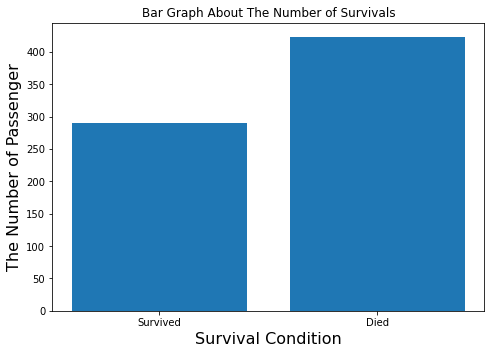

In [120]:
#Q10

#10.1

import matplotlib.pyplot as plt
bar_graph1 = plt.figure()
ax = bar_graph1.add_axes([0,0,1,1])
survived = ['Survived','Died']
passengers = [len(titanic_df.loc[titanic_df['Survived']==1]) , len(titanic_df.loc[titanic_df['Survived']==0])]
ax.bar(survived,passengers)
plt.xlabel('Survival Condition', fontsize = 16) 
plt.ylabel('The Number of Passenger', fontsize = 16) 
  
# displaying the title
plt.title("Bar Graph About The Number of Survivals")
plt.show()

Text(0.5, 1.0, 'Heatmap About the Correlations Between the Numerical Variables ')

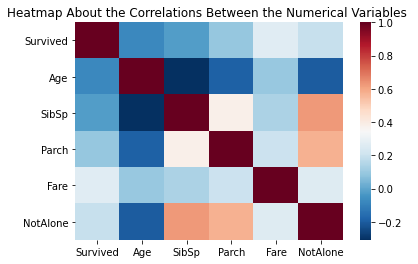

In [121]:
#10.2
import seaborn as sns
sns.heatmap(corrMatrix, cmap="RdBu_r")
plt.title("Heatmap About the Correlations Between the Numerical Variables ")

According to Q9, Lady, Mlle, Mme, Ms, Sir, and the Countess all have survival rates 1.0, which are equally high. Thus, there are 6 highest survival rate.


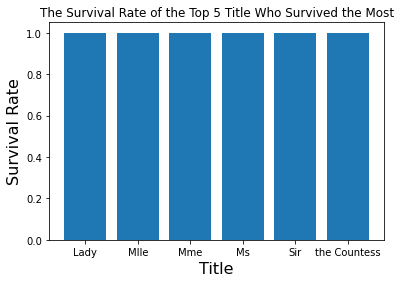

In [122]:
#10.3

#I drew two bar plots. The first one is the top 5 titles with the highest survival rate, and the second one is the top 5 titles with the most survivals.
# The bar graph showing the top 5 titles who have the highest survival rate 
print("According to Q9, Lady, Mlle, Mme, Ms, Sir, and the Countess all have survival rates 1.0, which are equally high. Thus, there are 6 highest survival rate.")
labels = ['Lady', 'Mlle', 'Mme', 'Ms', 'Sir', 'the Countess'] #Label the TOP 6 TITLES 
rate = [1,1,1,1,1,1] #survival rate of each title 
plt.bar(labels,rate) #draw the bar plot
plt.xlabel('Title', fontsize = 16) 
plt.ylabel('Survival Rate', fontsize = 16) 
plt.title("The Survival Rate of the Top 5 Title Who Survived the Most")
plt.show()

0 1 0 3 0 1 1 21 105 2 1 67 85 1 0 1 1
The top 5 titles who have the most survivals are Dr, Master, Miss, Mr, and Mrs


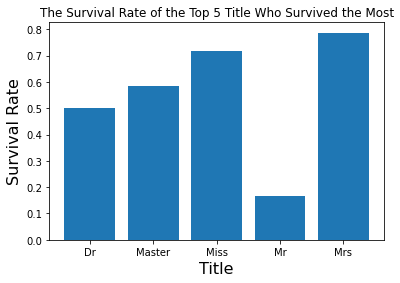

In [123]:
# The bar graph showing the top 5 titles who have the most survivals 

#Count the number of survivals for each title
Capt_number = len(titanic_df.loc[(titanic_df["Title"]==' Capt') & (titanic_df["Survived"]==1)])
Col_number = len(titanic_df.loc[(titanic_df["Title"]==' Col') & (titanic_df["Survived"]==1)])
Don_number = len(titanic_df.loc[(titanic_df["Title"]==' Don') & (titanic_df["Survived"]==1)])
Dr_number = len(titanic_df.loc[(titanic_df["Title"]==' Dr') & (titanic_df["Survived"]==1)])
Jonkheer_number = len(titanic_df.loc[(titanic_df["Title"]==' Jonkheer') & (titanic_df["Survived"]==1)])
Lady_number = len(titanic_df.loc[(titanic_df["Title"]==' Lady') & (titanic_df["Survived"]==1)])
Major_number = len(titanic_df.loc[(titanic_df["Title"]==' Major') & (titanic_df["Survived"]==1)])
Master_number = len(titanic_df.loc[(titanic_df["Title"]==' Master') & (titanic_df["Survived"]==1)])
Miss_number = len(titanic_df.loc[(titanic_df["Title"]==' Miss') & (titanic_df["Survived"]==1)])
Mlle_number = len(titanic_df.loc[(titanic_df["Title"]==' Mlle') & (titanic_df["Survived"]==1)])
Mme_number = len(titanic_df.loc[(titanic_df["Title"]==' Mme') & (titanic_df["Survived"]==1)])
Mr_number = len(titanic_df.loc[(titanic_df["Title"]==' Mr') & (titanic_df["Survived"]==1)])
Mrs_number = len(titanic_df.loc[(titanic_df["Title"]==' Mrs') & (titanic_df["Survived"]==1)])
Ms_number = len(titanic_df.loc[(titanic_df["Title"]==' Ms') & (titanic_df["Survived"]==1)])
Rev_number = len(titanic_df.loc[(titanic_df["Title"]==' Rev') & (titanic_df["Survived"]==1)])
Sir_number = len(titanic_df.loc[(titanic_df["Title"]==' Sir') & (titanic_df["Survived"]==1)])
the_Countess_number = len(titanic_df.loc[(titanic_df["Title"]==' the Countess') & (titanic_df["Survived"]==1)])

print(Capt_number,
Col_number,
Don_number,
Dr_number,
Jonkheer_number,
Lady_number,
Major_number,
Master_number,
Miss_number,
Mlle_number,
Mme_number,
Mr_number,
Mrs_number,
Ms_number,
Rev_number,
Sir_number,
the_Countess_number)

print("The top 5 titles who have the most survivals are Dr, Master, Miss, Mr, and Mrs")
labels2 = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs'] #Label the TOP 5 TITLES 
rate2 = [Dr, Master, Miss, Mr, Mrs] #survival rate of each title 
plt.bar(labels2, rate2) #draw the bar plot
plt.xlabel('Title', fontsize = 16) 
plt.ylabel('Survival Rate', fontsize = 16) 
plt.title("The Survival Rate of the Top 5 Title Who Survived the Most")
plt.show()

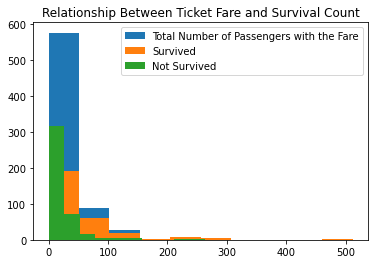

In [124]:
#10.4

plt.hist(titanic_df["Fare"], label = "Total Number of Passengers with the Fare")
plt.hist(titanic_df_survived["Fare"], label = "Survived")
plt.hist(titanic_df_not_survived["Fare"], label = "Not Survived")
plt.title("Relationship Between Ticket Fare and Survival Count")
plt.legend(loc="upper right")